# Confidence Intervals

*Author: Jose A. Hernando, X. Cid Vidal*, February 2025

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/xabiercidvidal/USC-TA/master)

In [65]:
import time

print( ' Last Execution ', time.asctime())

 Last Execution  Fri Feb 28 10:33:00 2025


In [66]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# possible styles: ggplot (simplicity), bmh (scientify data), 
plt.style.context('seaborn-colorblind') 

import htcore as htcore
import httoys as httoys
import htcint as htcint
import htcint_examples as htexam

# ploting images
from IPython.display import display, Image

## Introduction

We usually indicate that a given parameter $\mu$ (i.e branching ratio) has an upper limit at 90 or 95% CL  (e.g. $\mathcal{B}(B^0\to\mu\mu)$ < $2.6 \times 10^{-10}$ at 95 % CL, by LHCb).

Sometimes we quote an interval for the parameter $\mu$ as a **confidence interval** (CI) with a **confidence level** (CL) range.

But what does it mean? 

It means a very different thing for a frequentist and a bayesian!

And... how are they computed?

## Frequestist vs Bayesians

Frequentists talk about experiments in the same conditions. Bayesians talk about probabilities based on a prior knowledge or a 'reasonable' guess.

**Frequentists** say a CI **covers** the true value at a given $\beta$ CL. That means that if you repeat a large number of times, $m$, an experiment, and for each one you set a CI $\{\mathrm{CI}_i, \, i=1, \dots, m \}$, at least a fraction $\beta$ of the CIs cover the true value. 

A frequentist needs to provide a method to **construct the CI**. The method should provide the correct **coverage**.

**Bayesians** talk about **credible intervals** (CI), which means that the probability that the true parameter is inside the CI is greater or equal to some $\beta$ value. 

That sounds most like what you want, but unfortunately to get it, you need to accept some assumptions or some 'reasonable' priors.


For a frequentist a CI indicates the limit in which the data instance $x$  is considered an *extreme* event with respect to the parameter $\mu$ at a given $\beta$ CL.

But to indicate if $x$ is an *extreme* event, we need to **order** data as *extreme* with respect to a given $\mu$ value.

In the following cells, we will use the *counting experiment* as an example.

In a counting experiment, you expect some known background, e.g., $b= 3$ events in a kinematical window (for example in a range or energy or a band in an invariant mass), and an unknown signal with strength $\mu >= 0$.

## Classical frequentist CI

Given $x$ data that is related to a theoretical, unknown, parameter $\mu$ via a pdf, $g(x | \mu)$, (e.g., $x$ is poisson distributed with mean $\mu$), how can we provide a frequentist CI for $\mu$ given $x$?

Classical CIs are obtained using the **Neyman construction**. 

Current or modern CIs are obtained using **Feldman-Cousins construction**.


The Neyman construction defines a **confidence belt** in the plane $(x, \mu)$.

First, for a given $\mu$  and the pdf, $g(x | \mu)$, we define an interval $[x_l(\mu), x_u(\mu)]$ where at least $\beta$ of the possible $x$ values are contained inside. We will describe later how this interval is constructed.

The union of the intervals $[x_l(\mu), x_u(\mu)]$ as a function of $\mu$ defines a confidence region, a belt; in the plane $(x,  \mu)$.


There are three different ways to define the interval $[x_l(\mu), x_u(\mu)]$ for given $\mu$.

**Lower, central and upper limit intervals**. 

The lower interval:

$$
\int_{-\infty}^{x_l(\mu)} g(x | \mu) \, \mathrm{d} x \le 1-\beta
$$

For the upper:

$$
\int_{x_u(\mu)}^{\infty} g(x | \mu) \, \mathrm{d} x \le 1-\beta
$$

And the central:

$$
\int_{x_l(\mu)}^{\infty} g(x | \mu) \, \mathrm{d}x, \;  \int_{-\infty}^{x_u(\mu)} g(x | \mu) \, \mathrm{d}x \le (1-\beta)/2 
$$

Notice that frequentists are **conservative** and $\beta$ CL implies at least $\beta$ CL. 


In the next cells we compute the central, lower and upper interval for a given value of $b = 3$ and $\mu = 0.5$ of a poisson distribution.

interval ( 1 , 7 )
coverage  94.30636944863619 %


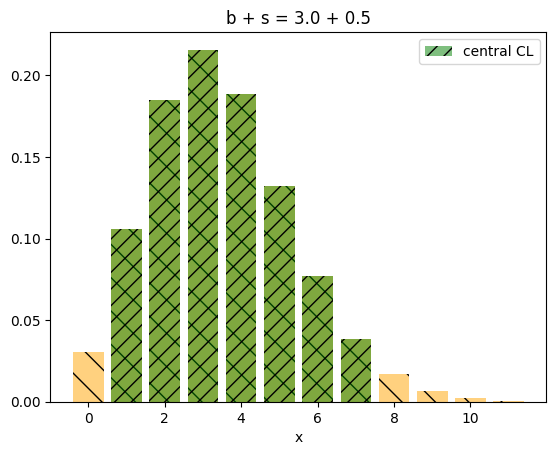

In [67]:
b, mu = 3., 0.5
beta  = 0.90
alpha = (1- beta)/2.
ns = np.arange(12)
ps = stats.poisson.pmf(ns, b + mu)
plt.bar(ns, ps, color = 'orange', hatch='\\', alpha = 0.5);
i0     = int(stats.poisson.ppf(alpha  , b + mu))
i1     = int(stats.poisson.ppf(1-alpha, b + mu)) + 1
plt.bar(ns[i0:i1], ps[i0:i1], color = 'green', hatch='//', alpha = 0.5, label = 'central CL');
plt.xlabel('x'); plt.title('b + s = '+str(b)+' + '+str(mu)); plt.legend();
print('interval (', i0, ',', i1-1, ')')
print('coverage ', 100 * np.sum(ps[i0:i1]), '%')

interval ( - , 6 )
coverage  93.47119029710466 %


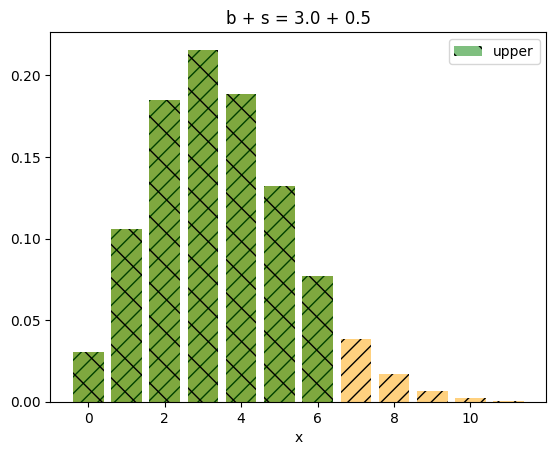

In [68]:
b, mu = 3., 0.5
beta  = 0.90
ns = np.arange(12)
ps = stats.poisson.pmf(ns, b + mu)
i0     = int(stats.poisson.ppf(beta  , b + mu)) + 1
plt.bar(ns     , ps     , color = 'orange', hatch='//', alpha = 0.5);
plt.bar(ns[:i0], ps[:i0], color = 'green' , hatch='\\', alpha = 0.5, label = 'upper');
plt.xlabel('x'); plt.title('b + s = '+str(b)+' + '+str(mu)); plt.legend();
print('interval ( - ,', i0 - 1, ')')
print('coverage ', 100 * np.sum(ps[:i0]), '%')

interval ( 1  , - )
coverage  96.95136243577515 %


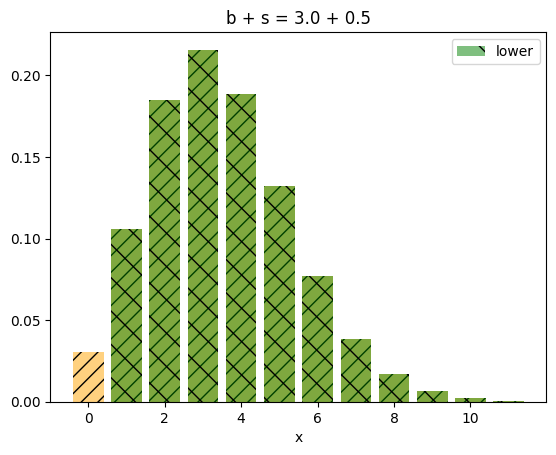

In [69]:
b, mu = 3., 0.5
beta  = 0.90
ns = np.arange(12)
ps = stats.poisson.pmf(ns, b + mu)
i0     = int(stats.poisson.ppf(1 - beta  , b + mu)) 
plt.bar(ns     , ps     , color = 'orange', hatch='//', alpha = 0.5);
plt.bar(ns[i0:], ps[i0:], color = 'green' , hatch='\\', alpha = 0.5, label = 'lower');
plt.xlabel('x'); plt.title('b + s = '+str(b)+' + '+str(mu)); plt.legend();
print('interval (', i0 , ' , - )')
print('coverage ', 100 * np.sum(ps[i0:]), '%')

**Class exercise**: Consider a poisson distribution with $b=3$ background events and a value of possible signal, $\mu=4$. Give the 90% lower, upper and central interval.


<table style="border: 1px solid black; border-collapse: collapse;">
    <tr>
        <td style="border: 1px solid black; padding: 8px;font-size: 14px;">We define the <b>confidence belt</b> scanning along the $\mu$ values and, for each one, knowing the pdf $g(x | \mu)$, computing the interval $[x_l(\mu), x_u(\mu)]$ that provides a $\beta$ % containment.</td>
    </tr>
</table>


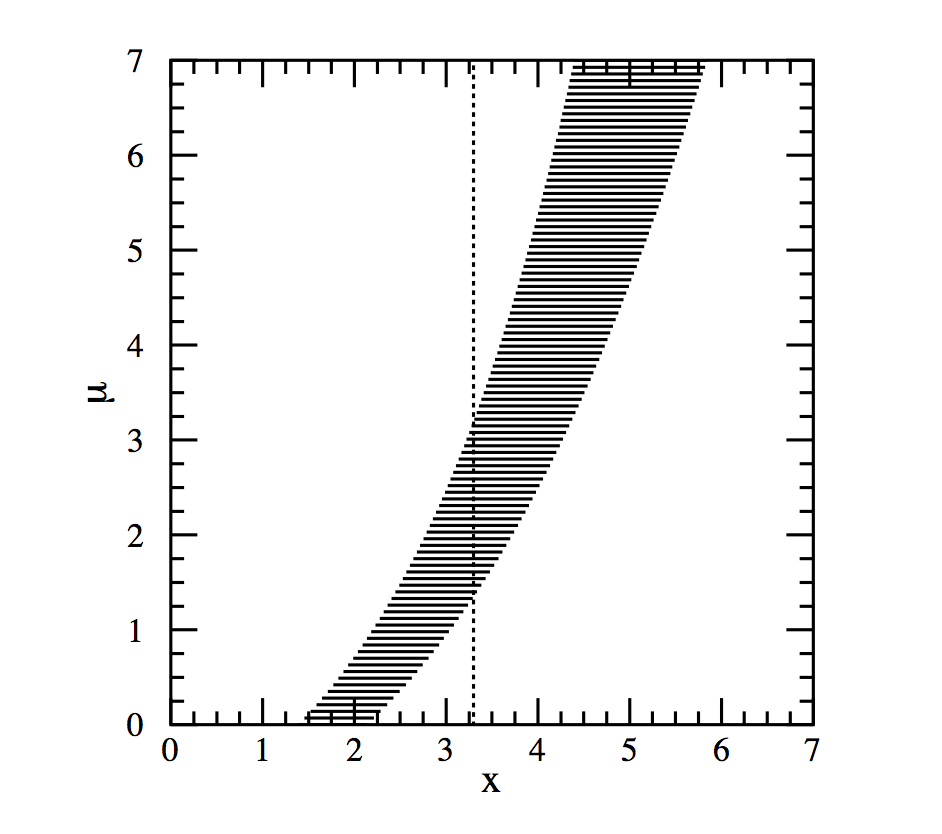

In [70]:
from IPython.display import Image, display
display(Image('figs/CI_belt.png', width=500))


In case we measure $x_0 = 3.2$, the CI is given by the values of $\mu$ where the vertical line $x_0 = 3.2$ meets the boundaries of the confidence belt.

**Example**: Construct the *confidence belt* CI at 90% and 68% CL considering a counting experiment with background $b$ and unknown signal $\mu$. 

In case the pdf is a poisson with mean $b + \mu$. We scan along $\mu$ and for each $\mu$ we obtain the interval $[x_l(\mu), x_u(\mu)]$ using the central interval at some confidence level (e.g. 90%). 

The we unify the border of the segments and we define the confident belt.

- Which are the $\mu$ CI, for $b=3$ and $x_0 = 10$? 

In [71]:
def plt_confbelt(x0, b, beta1 = 0.90, beta2 = 0.68,beta3=0, btype = 'classical',
                 mumax = 12, musize=200):
    """ draws the CI confident belt for beta1 and beta2 CL of type = ('classical', 'fc')
        draws a line in the confident belt plane for x0 and print the ci for beta1 and beta2
        beta1 = 90 %CL and beta2 = 68% CL
    """
    mus = np.linspace(0., mumax, musize)
    print("number of mus scanned =",len(mus))
    if beta3:
        xls, xus, ci1 = htcint.ci_belt(mus, b, beta3, type = btype)
        plt.fill_betweenx(mus, xls, xus, color = 'darkblue', alpha = 0.5, 
                      label = str(int(100*beta3))+'% CL');    
    xls, xus, ci1 = htcint.ci_belt(mus, b, beta1, type = btype)
    plt.fill_betweenx(mus, xls, xus, color = 'blue', alpha = 0.5, 
                      label = str(int(100*beta1))+'% CL');
    xls, xus, ci2 = htcint.ci_belt(mus, b, beta2, type = type)
    plt.fill_betweenx(mus, xls, xus, color = 'cyan', alpha = 0.5, 
                      label = str(int(100*beta2))+'% CL' );
    plt.plot((x0 + 0.1 , x0 + 0.1), (0, mumax), color = 'black', ls = '--')
    plt.xlabel('$x$'); plt.ylabel('$\mu$'); plt.title(type); plt.grid(); plt.legend()
    print('CI ', ci1(x0), ' at ', beta1, 'CL for b = ', b, ' and x0 = ', x0)
    print('CI ', ci2(x0), ' at ', beta2, 'CL for b = ', b, ' and x0 = ', x0)
    return ci1, ci2

number of mus scanned = 2000
CI  (np.float64(2.431215607803902), np.float64(12.0))  at  0.9 CL for b =  3  and x0 =  10
CI  (np.float64(3.907953976988494), np.float64(11.243621810905452))  at  0.68 CL for b =  3  and x0 =  10


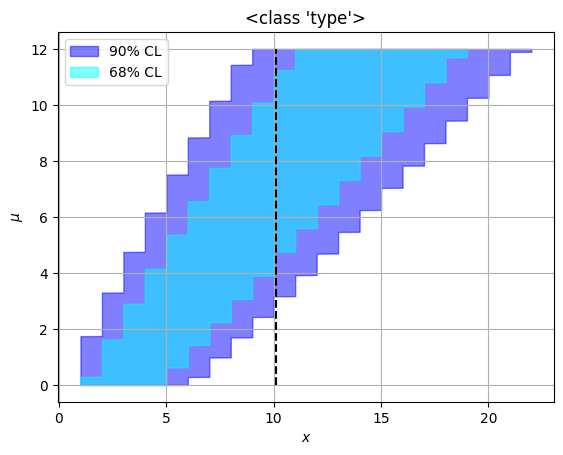

In [72]:
x0, b = 10, 3
plt_confbelt(x0, b, btype = 'classical', mumax = 12, musize = 2000);

**Exercise**: Use the classical construction of CI for the case of a gaussian with sigma 1 and $\beta = 68$ % CL.


## Feldman-Cousins (FC) CI

Feldman and Cousins, when working in the 90's on the [NOMAD experiment](https://cds.cern.ch/record/1666456?ln=en), found several worrisome issues with classical CIs.

And they proposed an ordering principle to compute the extreme data, $x$, with respect to $\mu$, based on the likelihood ratio.

This ordering principle avoids the decision of lower, central and upper intervals. It passes smoothly from one to another.

Now is the new classical.

<div style="display: flex; justify-content: center; align-items: center;">
    <div style="text-align: center; margin-right: 10px;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Gary_Feldman_Profile.jpg" width="200">
        <p>Gary Feldman</p>
    </div>
    <div style="text-align: center;">
        <img src="https://www.physics.ucla.edu/~cousins/homepage/Robert_Cousins_photo-c.jpg" width="200">
        <p>Robert Cousins</p>
    </div>
</div>


Historically, [Feldman and Cousins](https://arxiv.org/abs/physics/9711021) encountered:

First, one has the temptation of quoting a **flip-flop** result: if we do not observe a signal, we quote a 90% CL lower interval, if we get an observation, we quote a 90% central CI.  That is... you present your result depending on your actual observation. Sounds bad! *Biased* result


In this example, data, $x$, follows a normal gaussian. At Z=3, the confidence belt passes from 90 % CL lower limit to 90% CL central limit. The belt has not the proper frequentist coverage.

<img src='figs/CI_FC_flipflop.png' width=400 style = 'float: center'>

We should decide what type of interval to quote before doing the measurement! 


number of mus scanned = 2000
CI  None  at  0.9 CL for b =  3  and x0 =  0
CI  None  at  0.68 CL for b =  3  and x0 =  0


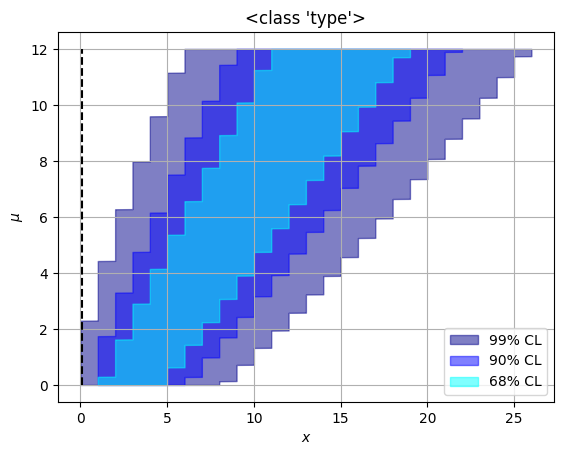

In [73]:
x0, b = 0, 3
plt_confbelt(x0, b, beta3=0.99,btype = 'classical', mumax = 12, musize = 2000);

Second, **there is no CI at 90% CL for the case $b=3$ and $x_0= 0$**. (See the previous example) Imagine that NOMAD, expecting 3 background events, saw no signal, and had no result to quote!

This was unacceptable! It was a posible result of the NOMAD experiment: having no result!

FC proposed a construction interval method (**Feldman-Cousins** method) that smoothly passes from lower to central intervals and avoids the problem of the no CI observed at $b=3, x_0 = 0$.

**Exercise**: Verify that the flip-flop problem has not the proper coverage. For this, set the flip-flop construction and test the coverture for $\mu_{true} = 3$.
Why does the case $b=3$ and $x_0 = 0$ have no classical CI at 90% CL?

FC proposed an **ordering rule**, a variable that quantifies **how extreme** data $x$ is with respect to $\mu$.

The variable is the likelihood ratio with respect to the best-estimate $\hat{\mu}(x)$.

$$
t_\mu(x) =  \frac{\mathcal{L}( x | \mu)}{ \mathcal{L}(x | \hat{\mu}(x))}
$$


The best-estimate $\hat{\mu}(x)$ is the value of $\mu$ that maximizes the likelihood $\mathcal{L}(x| \hat{\mu}(x))$ for a given measurement $x$.

The values of $t_\mu$(x) vary between $[0, 1]$. 

The $x$ measurements with $t_\mu(x)$ values approaching 1 are "likely" with respect to $\mu$. Those with values close to 0 are "unlikely".

The lower the $t_\mu(x)$ value the most extreme a $x$ measurement is.

For example, for a given $\mu$ and $x$, if the best estimate $\hat{\mu}(x)$ is close to $\mu$, both likelihoods are similar and the ratio, $t_\mu(x)$, is close to 1.

Nevertheless, a given $x$ may have a small likelihood, $\mathcal{L}(x | \mu)$, but the maximum likelihood for that $x$, $\mathcal{L}(x | \hat{\mu}(x))$ may also be small, then $t_\mu(x)$ is close to 1, and $x$ can gain priority with respect to other $x$'s values for the same $\mu$. 

That is the case for $x = 0$ for $b = 3$. The problematic case discussed above which could cause having no result in the classical construction.

**Example**: Consider the case of $b=3$ and $\mu = 0.5$ and construct the FC segment, $[x_l(\mu), x_u(\mu)]$ along $x$ at 90% CL.


For each $n$, that has probability $g(n | b + \mu)$, with $b=3, \, \mu = 0.5$, we estimate $\hat{\mu}(n)$.

The best estimate $\hat{\mu}(n)$ is $n-b$, i.e., the value the maximizes $g(n | b+ \hat{\mu} = n)$.

Except for $n\le 3$, where it is $0$, as there is no physical meaning of a negative signal. 

For each $n$ we compute the likelihood ratio $t_\mu(n)$. 

In this case:

$$
t_\mu(n) = \frac{g(n | b + \mu)}{ g( n | b + \hat{\mu}(n))};{\rm~and~} q_\mu (x) = -2 \mathrm{ln}(t_\mu(x))
$$


Then we order the $n$ according to $t_\mu(n)$ from highest to lowest (in this case). 

For each value $n$, we need to compute the probability $g(n | b + \mu)$ and $g(n | b + \hat{\mu})$

We accept $n$ values in the CI according to the $t_\mu$ order and considering its probability $g(n | b + \mu)$ till we reach or surpass 90% probability.

*Inspect the code in the next cells*

In [90]:
b, mu  = 3, 0.5
ns     = np.arange(12)
muhats = np.asarray([max(0, ni - b) for ni in ns])
def tmu(ni, muhat, b = b, mu = mu):
    return stats.poisson.pmf(ni,  b + mu) / stats.poisson.pmf(ni, b + muhat)
gmus    = np.asarray([stats.poisson.pmf( ni, b + mu) for ni in ns])
gmuhats = np.asarray([stats.poisson.pmf( ni, b + muh) for ni, muh in zip(ns, muhats)])
tmus    = np.asarray([tmu(ni, muhati) for ni, muhati in zip(ns, muhats)]) 
dic = {'n (x)' : ns,  'muhat(x)' : muhats, 
       'g(n | b + muhat)' : gmuhats,  'g(n| b+ mu)': gmus, 'tmu(n)': tmus, 'qmu ': -2 * np.log(tmus) }
df = pd.DataFrame(dic)

The next table shows the values of $g(n | b+ \mu), \, \hat{\mu}(x), \, g(n | b + \hat{\mu}(n)), \, t_\mu(x), q_\mu (x) = -2 \mathrm{ln}(t_\mu(x))$ for the possible measurements $n$ in a single counting experiment with $b = 3$ and $\mu = 0.5$.

In [91]:
df

,n (x),muhat(x),g(n | b + muhat),g(n| b+ mu),tmu(n),qmu
0,0,0,0.049787,0.030197,0.606531,1.000000
1,1,0,0.149361,0.105691,0.707619,0.691699
2,2,0,0.224042,0.184959,0.825556,0.383397
3,3,0,0.224042,0.215785,0.963148,0.075096
4,4,1,0.195367,0.188812,0.966450,0.068251
5,5,2,0.175467,0.132169,0.753237,0.566749
6,6,3,0.160623,0.077098,0.479995,1.467958
7,7,4,0.149003,0.038549,0.258714,2.704061
8,8,5,0.139587,0.016865,0.120823,4.226857
9,9,6,0.131756,0.006559,0.049779,6.000309


In the next cell we plot $g(n | b + s)$ and $t_\mu(x)$ for n-values given $b = 3$ and $\mu = 0.5$

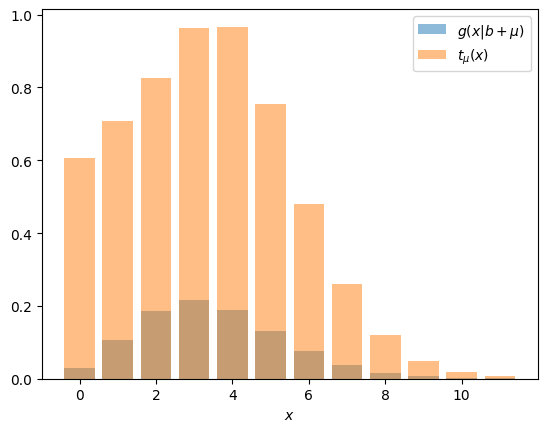

In [92]:
plt.bar(ns, gmus, alpha = 0.5, label = '$g(x | b + \mu)$');
plt.bar(ns, tmus, alpha = 0.5, label = '$t_\mu(x)$');
plt.xlabel('$x$'); plt.legend();

In [93]:
def plt_rmu_fc(mu, b, beta = 0.9):
    rmu, fout = htcint.rmu(mu, b, beta, type = 'fc', full_output = True)
    print('Rmu segment for b ', b, 'and mu ', mu, ' = ', rmu);
    tms, cps, ns = [ifout[0] for ifout in fout], [ifout[1] for ifout in fout], [ifout[2] for ifout in fout]
    #tms = [-2*np.log(tmi) for tmi in tms]
    ps = [cps[0]]; ps = ps + [cps[i]-cps[i-1] for i in range(1, len(ns))]
    ks = range(len(ns))
    ax = plt.gca()
    axb = ax.twinx()
    ax.bar (ks[:15],  ps[:15], label = '$g(x | b + \mu)$', alpha = 0.5, color = 'green');
    ax.plot(ks[:15], cps[:15], marker = 'o', color = 'green',  
             label = 'cdf(x| b + $\mu$)', alpha = 0.5);
    axb.bar(ks[:15], tms[:15], label = '$t_{\mu}(x)$', alpha = 0.5, color = 'orange');
    ax.plot((0, 15), (beta, beta), color = 'black', ls = '--');
    ax.set_xlabel(r'$x$'); ax.set_ylabel('probabilty'); axb.set_ylabel(r'$t_\mu$')
    plt.xticks(ks[:15], labels = ns[:15])
    plt.title('b = '+str(b)+', $\mu$ = '+str(mu)); plt.grid()
    ax.legend(loc = 1); axb.legend(loc = 4)
    return 

In the next cell we plot in order of better $t_\mu(n)$, with its correspondent $g(n | b+\mu), \; t_\mu(n)$ and the cumulative function, $\mathrm{cdf}(n | b+\mu)$.

The interval $[n_l(\mu), n_u(\mu)]$ is defined by the range of $n$ values till the cdf surpassses a given $\beta$ containment (the dashed line in the plot). 

For this case $b = 3, \, \mu = 0.5, \; \beta = 90$ %.

Rmu segment for b  3.0 and mu  0.5  =  (np.int64(0), np.int64(6))


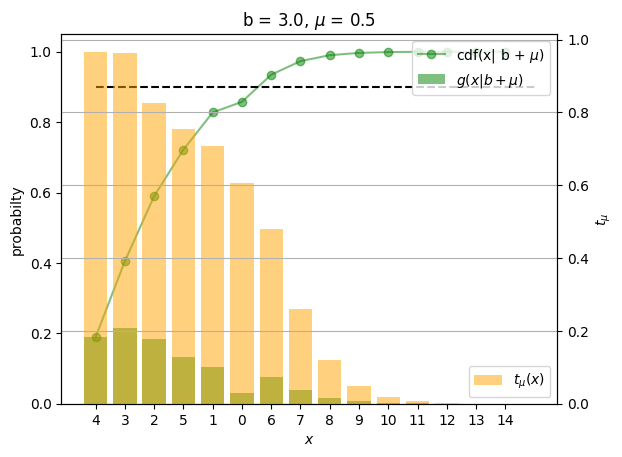

In [94]:
mu, b, beta = 0.5, 3., 0.90
plt_rmu_fc(mu, b, beta);

The computation of the actual confidence belt (code taken from _rmu_fc in htcint).
Take relevant ts,ps and ns. Sort them according to ts
```
zs = list(zip(ts, ps, ns))
zs.sort()
zs.reverse()
ts = np.array([zi[0] for zi in zs])
ps = np.array([zi[1] for zi in zs])
ns = np.array([zi[-1] for zi in zs])
```
Compute the cumulative probability, get the threshold:
```
cps = np.array([sum(ps[:i+1]) for i in range(ndim)])
sel = (cps < beta)
xbeta = min(cps[~sel])
```
The belt is given by the maximum and minimum ns within the relevant range:
```
sel = (cps <= xbeta)
iu, il = min(ns[sel]), max(ns[sel])
```

The next cell shows the confidence belt using the FC ordering for the case of a single counting experiment with $b = 3$ at 68% and 90% containment.

*Explore* and obtain the confidence interval for different measurements, for example the problematic one $x = 0$ that we studied with the classical construction.

number of mus scanned = 2000
CI  (np.float64(0.0), np.float64(0.9484742371185593))  at  0.9 CL for b =  3  and x0 =  0
CI  None  at  0.68 CL for b =  3  and x0 =  0


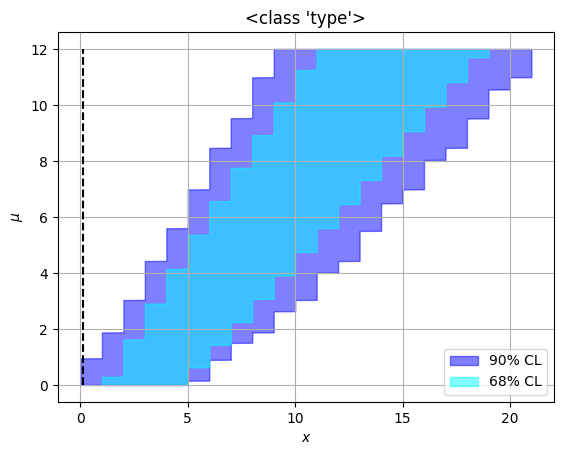

In [79]:
x0, b = 0, 3
plt_confbelt(x0, b, btype = 'fc',musize=2000);

Feldman-Cousins can be calculated in ROOT
```
import ROOT
CL = 0.9
fc = ROOT.TFeldmanCousins(CL); print(fc.CalculateLowerLimit(0,7),fc.CalculateUpperLimit(0,7))
```

This is an example of what you get:
    
<img src='figs/cl_intervals.png' width=1000 style = 'float: left'>


**Exercise**: FC is a frequentist method. Verify now that the FC construction guarantees **coverage** for some examples $b = 3, \mu_{true} = 0.5$.

**Exercise**: Compare the classical and frequentist intervals, where do they differ? where are they equal? Use as example the case $b=3$.

### FC confidence intervals in n-dimensions


The classical ordering is hard to extend to n-dimensions. But FC is not.

We redefine the variable:

$$
t_\mu = -2 \ln \frac{\mathcal{L}(x | \mu)}{\mathcal{L}(x| \hat{\mu}(x))}
$$



In this case, if $x$ gives $\hat{\mu}(x) \simeq \mu$, $t_\mu \sim 0$, while if $\hat{\mu}(x)$ is different from $\mu$, $t_\mu$ is large. 

The larger $t_\mu(x)$ the more extreme is $x$ with respect to $\mu$.


The pdf, $g(t_\mu | \mu)$, allows us to set the most $1-\beta$ extreme $x$ data for a given $\mu$.

$$
\beta = \int_0^{t_{\mu}(\beta)} g(t_\mu | \mu) \, \mathrm{d}t_\mu
$$


There is no lower, central or upper integral. The ordering sets a unique interval

In this case $\mu$ is a vector. We scan a region of the vector space. For each point in that space we will compute the $t_\mu(x)$ pdf, $g(t_\mu | \mu)$, and the p-value of the observed data $x_0$. We will select the region of $\mu$, as the confidence region, whose p-values are inside the $\beta$ CL. 

**Example**: Compute the distribution of $t_\mu(x)$ for the case of $b=3$ and $s=0.5$ and $t_\mu$ value for the observed data $x_0 = 0$

This is how the computation works, from plt_tmus in htcint_examples.
First the compute the $t_\mu(x_0)$ and $t_\mu$ (for pseudo-experiments). 
```
ht   = htcore.htcomposite(rv, mu)
tmu0 = ht.tmu(x0, mu, mu0)
xs   = rv.rvs(mu, size = size)
tmus = [ht.tmu(xi, mu, mu0) for xi in xs]
```
We then get the relevant p-value and confidence intervals
```
print('p-value t0 :', np.sum(tmus >= tmu0)/(1.*size))
xl, xu = np.min(xs[tmus <= tmu0]), np.max(xs[tmus <= tmu0])
 ```

p-value t0 : 0.1726
(xl, xu) with tmu <= tmu0 : ( 0 ,  5 )


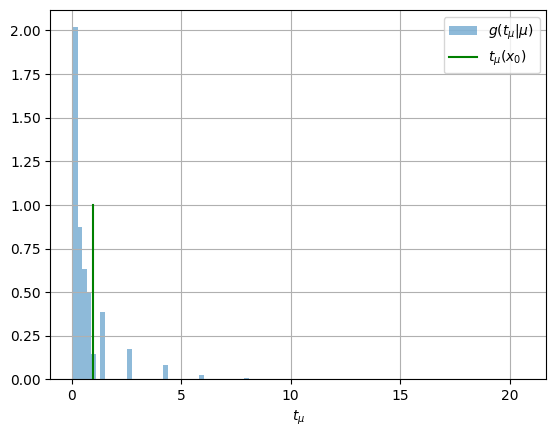

In [80]:
b, mu, x0, size = 3, 0.5, 0, 10000
htexam.plt_tmus(x0, stats.poisson, b + mu, b, size);

## Bayesian Credible Intervals

Bayesians provide a *credible integral* at a $\beta$ CL. The probability to find the true value inside the CI is $\beta$.

To obtain the CI, bayesians need the pdf $g(x | \mu)$, and  the prior probability of the relevant parameter, $\pi(\mu)$. 

In most cases, this prior is unknown, and we are forced to take a 'reasonable' prior. Using the Bayes' theorem we can compute the *posterior probability*:

$$
p(\mu | x) = \frac{g(x |\mu) \, \pi(\mu)}{p(x)}
$$

The denominator is the probiblitity to get $x$ for all posible hypotheses, $\mu$, i.e.:

$$
p(\mu | x) = \frac{g(x |\mu) \, \pi(\mu)}{\int g(x | \mu) \pi(\mu) \, \mathrm{d}\mu}
$$


### Example: low stats poisson

Consider the case of a counting experiment with $b$ background events ($b$ is known) and expect a signal $s$ on top. If one measures $n$, the posterior probability for $s$ is:

$$
p(b + s | n) = \frac{p(n | b + s) \,\pi(s)}{\int_s p(n | b+s) \, \pi(s) \, \mathrm{d}s}
$$

To get the *upper limit* CI at $\beta$ CL, we integrate the posterior till the upper value, $s_u$, to get a total probability $\beta$.

$$
\int_{0}^{s_u} p(b + s | n)  \, \mathrm{d}s = \beta
$$


We can take a 'reasonable' prior on $s$ (as a constant if $s>0$)

$$
\pi(s) = \left\{ \begin{array}{ll} 
1 & \mbox{if $s \ge 0$} \\
0 & \mbox{if $s \lt 0$}
\end{array} \right.
$$

The posterior of data $n$ is proportional to:

$$
p(b + s | n) \propto \frac{(b+s)^n e^{-(b+s)}}{n!} = \Gamma(b+s,n+1,1)
$$

where, $\Gamma(x, \alpha, \lambda)$ is the gamma pdf. 



For the case $b=0$, the denominator (see above) $\int_s p(n |s) \, \pi(s) \, \mathrm{d}s =  1$, and given the numerator, computing the CI is reduced to:

$$
\int_{0}^{s_u} \Gamma(s, n+1, 1) \, \mathrm{d}s = \beta
$$

For a value of $b$, we need to solve:

$$
\frac{\int_{0}^{s_u} \Gamma(b+s, n+1, 1) \, \mathrm{d}s}{\int_{0}^{\infty} \Gamma(b+s, n+1, 1) \, \mathrm{d}s} = \beta ;~~[{\rm equation~(1)}]
$$
Which can be computed with the change $u=s+b$.

**Example:** Compute the posterior probability of the signal $s$ for an experiment that expects $b = 3$ background events and measures $n_0 = 0$ or $n_0 = 6$.

In [123]:
def bayes_poisson_upper(b, x0, nmax = 10, nbins = 100):
    ss = np.linspace(0., nmax, nbins)
    ds = ss[1]-ss[0]
    ## compute the probabilities for each s,nobs pair, and normalize them (use denominator of equation (1) above)
    ys = np.array([stats.gamma.pdf(b + si, x0 +1) for si in ss])
    norma = np.sum(ys*ds); ys = ys/norma
    print('integral :', np.sum(ys)*ds)
    plt.plot(ss, ys, color = 'black');
    betas  = [0.68, 0.90, 0.95]
    colors = ['red', 'green', 'yellow']
    ## determine the value for which the cumulative probability reaches 68,90 or 95%
    for i, beta in enumerate(betas):
        nu = htcint.ciarray.upper(ss, ys, 1.- beta)
        print('Upper limit ',str(int(100.*beta)), '% CL :', nu )
        sel = (ss <= nu)
        plt.fill_between(ss[sel], ys[sel], color = colors[i],
                         alpha = 0.5, label = str(int(100*beta))+'% CL');
    plt.legend(); plt.xlabel(r'$s$')
    plt.grid()
    return

integral : 0.9999999999999999
Upper limit  68 % CL : 1.1422845691382766
Upper limit  90 % CL : 2.3046092184368736
Upper limit  95 % CL : 3.006012024048096


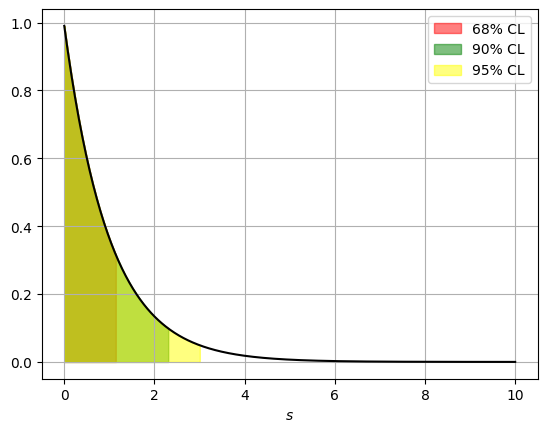

In [112]:
b, n0 = 3., 0.
nmax = 2.*(n0 + b)
bayes_poisson_upper(b, n0, 10, 500);

In [124]:
def bayes_poisson_ci(b, x0, nmax = 10, nbins = 100):
    ss = np.linspace(0., nmax, nbins)
    ds = ss[1]-ss[0]
    ## compute the probabilities for each s,nobs pair, and normalize them (use denominator of equation (1) above)
    ys = np.array([stats.gamma.pdf(b + si, x0 +1) for si in ss])
    norma = np.sum(ys*ds); ys = ys/norma
    print('integral :', np.sum(ys)*ds)
    plt.plot(ss, ys, color = 'black');
    betas  = [0.68, 0.90, 0.95]
    colors = ['red', 'green', 'yellow']
    ## determine the value for which the cumulative probability surpasses (1-beta/2) or 1-(1-beta/2) 
    for i, beta in enumerate(betas):
        sl, su = htcint.ciarray.ci(ss, ys, beta)
        print('CI ',str(int(100.*beta)), '% CL : (', sl, ', ', su, ')' )
        sel = (ss >= sl) & (ss <= su)
        plt.fill_between(ss[sel], ys[sel], color = colors[i],
                         alpha = 0.5, label = str(int(100*beta))+'% CL');
    plt.legend(); plt.xlabel(r'$s$')
    plt.grid()
    return

integral : 1.0000000000000002
CI  68 % CL : ( 4.68937875751503 ,  11.306613226452905 )
CI  90 % CL : ( 3.1262525050100196 ,  14.016032064128256 )
CI  95 % CL : ( 2.4488977955911824 ,  15.422845691382765 )


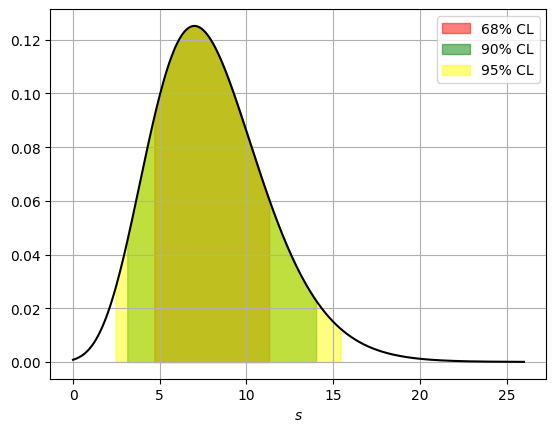

In [116]:
b, n0 = 3., 10
nmax = 2.*(n0 + b)
bayes_poisson_ci(b, n0, nmax, 500);

**Class exercise:** Compute the upper limit, $s_u$, using Bayes' CI at 90% CL for different values of $b$ and $n$ observations.

Let's go back to Equation (1) and the proposed change $u=s+b$

$$
\frac{\int_{0}^{s_u} \Gamma(b+s, n+1, 1) \, \mathrm{d}s}{\int_{0}^{\infty} \Gamma(b+s, n+1, 1) \, \mathrm{d}s} = \beta
$$

With the change

$s=0 \implies u = b$

$s=s_u \implies u = b+s_u$

Eq. (1) becomes

$$
\frac{\int_{b}^{b+s_u} \Gamma(u, n+1, 1) \, \mathrm{d}u}{\int_{b}^{\infty} \Gamma(u, n+1, 1) \, \mathrm{d}u} = \beta
$$

and

$$
\frac{\int_{0}^{b+s_u} \Gamma(u, n+1, 1) \, \mathrm{d}u-\int_{0}^{b} \Gamma(u, n+1, 1) \, \mathrm{d}u}{\int_{0}^{\infty} \Gamma(u, n+1, 1) \, \mathrm{d}u - \int_{0}^{b} \Gamma(u, n+1, 1) \, \mathrm{d}u} = \frac{\int_{0}^{b+s_u} \Gamma(u, n+1, 1) \, \mathrm{d}u-\int_{0}^{b} \Gamma(u, n+1, 1) \, \mathrm{d}u}{1 - \int_{0}^{b} \Gamma(u, n+1, 1) \, \mathrm{d}u} =
\beta
$$

so

$$
\int_{0}^{b+s_u} \Gamma(u, n+1, 1) \, \mathrm{d}u = \beta + (1-\beta)\int_{0}^{b} \Gamma(u, n+1, 1) \, \mathrm{d}u 
$$
